In [ ]:
import pandas as pd
import numpy as np

# Лабораторная работа 3

Построить 3 любых графика, анализирующих выбранный корпус данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/посты_сообщества_ИТМО.csv")
df['data'] = pd.to_datetime(df['data'], unit='s') #приводим дату к нормальному типу
df.head()

,id_group,id_post,data,description,title,text,views,likes,reposts
0,-94,57196,2024-04-12 13:00:03,NaN,NaN,Пятница! А где тусуются айтишники? 👇,7473.0,11,6
1,-94,57194,2024-04-12 09:00:02,NaN,NaN,"Каждый из нас, своего рода, художник 👨🏻‍🎨 \n \...",1542.0,3,2
2,-94,57190,2024-04-11 09:00:01,NaN,NaN,"Мы его ждали и он возвращается! Грандиозный, л...",3634.0,89,55
3,-94,57182,2024-04-10 12:39:06,Где узнать больше о DevOps и IT в целом? 13 ап...,Клип @itmoru,Тут про свежую IT-конференцию👇🏻\n\nВ ролике Вя...,3703.0,18,11
4,-94,57181,2024-04-10 11:41:01,NaN,NaN,Прекрасные весенние новости! ИТМО — лучший рос...,4597.0,106,18



Диаграмма рассеивания





In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

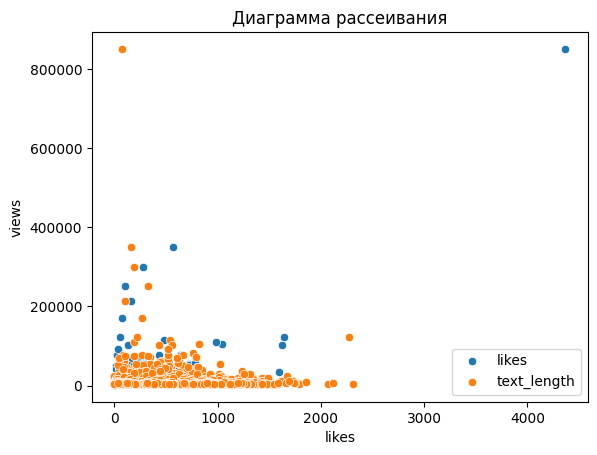

In [ ]:
#seaborn
x1 = df['likes']
x2 = df['text_length']
y = df['views']

fig, ax = plt.subplots()
sns.scatterplot(x = x1, y = y, label = 'likes')
sns.scatterplot(x = x2, y = y, label = 'text_length')

plt.title('Диаграмма рассеивания')
plt.show();

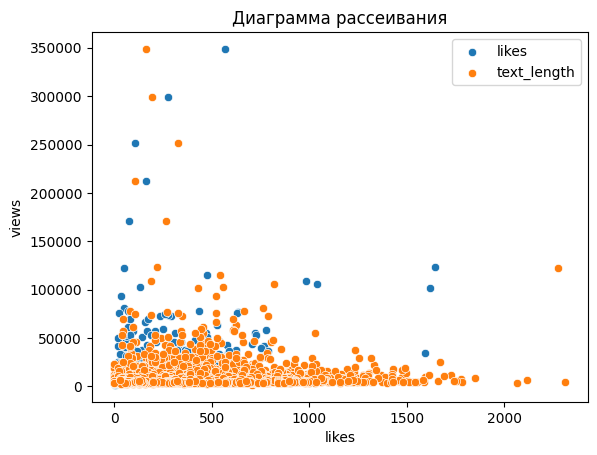

In [ ]:
max_index = df['views'].idxmax()

# Удаляем строку по найденному индексу, показатели сильно заверусившегося поста
df_new = df.drop(max_index)

#seaborn
x1 = df_new['likes']
x2 = df_new['text_length']
y = df_new['views']

fig, ax = plt.subplots()
sns.scatterplot(x = x1, y = y, label = 'likes')
sns.scatterplot(x = x2, y = y, label = 'text_length')

plt.title('Диаграмма рассеивания')
plt.show();

Гистограмма

In [ ]:
df['year'] = df['data'].dt.year


fig = px.histogram(df, x='year', y='views', title='Гистограмма зависимости года и просмотров', nbins=70)
fig.update_layout(xaxis_title="Год", yaxis_title="Просмотры")  # обновление макета с заголовками осей

fig.show()

In [ ]:
df_2023 = df[df['data'].dt.year == 2023].copy()
df_2023['Weekday'] = df_2023['data'].dt.day_name()

fig = px.histogram(df_2023, x='Weekday', y='views', title='Гистограмма зависимости дня недели и просмотров за 2023 год', nbins=70)
fig.update_layout(xaxis_title="День недели", yaxis_title="Просмотры")

fig.show()

Облако слов

In [ ]:
import re
#сделаем банк слов из столбца 'text' с текстами постов
word_bank = set()

# Проходим по каждой ячейке в столбце 'Text' и добавляем слова в банк слов, искоючая ссылки и знаки препинания
for text in df['text']:
  if pd.notnull(text):
    clean_text = re.sub(r'http\S+|www\S+|\d+|[%s]', '', text)
    words = clean_text.split()  # Разбиваем текст на слова
    clean_words = [re.sub(r'[^\w\s]', '', word) for word in words]
    word_bank.update(clean_words) # Обновляем банк слов, добавляя уникальные слова

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


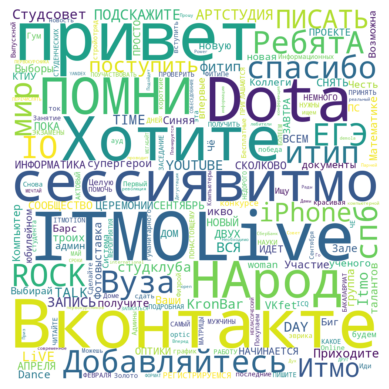

In [ ]:
#matplotlib
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

#стоп слова
nltk.download('stopwords')  # Загрузка стоп-слов из nltk
stop_words = set(stopwords.words('russian'))
filter_words = [word for word in word_bank if word.lower() not in stop_words]

filter_text = " ".join(filter_words)

wc = WordCloud(width=1000, height=1000, background_color="white")
wc.generate(filter_text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

Визуализация биграмм

In [ ]:
!pip install pymorphy3 > None

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
import pymorphy3
from string import punctuation
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#функция предобработки текстов
morph = pymorphy3.MorphAnalyzer()
punktuations = list(punctuation)
punktuations.append('—')
punktuations.append('... ')
punktuations.append('.... ')
punktuations.append('! ')
punktuations.append(')')
punktuations.append('(')
punktuations.append('=')
punktuations.append(';')
punktuations.append('--')
def preproc (text):
  token = word_tokenize(text.lower())
  words_without_punkt = [i for i in token if (i not in punktuations)]
  filter_words = [i for i in words_without_punkt if (i not in stop_words)]
  lem = [morph.parse(i)[0].normal_form for i in filter_words]
  return lem

In [ ]:
full_text = ''
for text in df['text']:
  if pd.notnull(text):
    clean_text = re.sub(r'http\S+|www\S+|\d+|[%s]', '', text)
    text_without_emoticons = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002500-\U00002BEF\U0001F900-\U0001F9FF\U0001F200-\U0001F2FF\U00002702-\U000027B0\U00002600-\U000026FF\U00002900-\U000029FF\U0001F900-\U0001F9FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U00002600-\U000026FF\U00002900-\U000029FF\U0001F900-\U0001F9FF\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U00002600-\U000026FF\U00002900-\U000029FF\U0001F900-\U0001F9FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U00002600-\U000026FF\U00002900-\U000029FF\U0001F900-\U0001F9FF]+', '', clean_text)
    full_text += text_without_emoticons

#считаем количество биграмм
pd.Series(nltk.ngrams(preproc(full_text), 2)).value_counts()

(университет, итмый)        5613
(итмый, itmo)               1667
(itmo, univerity)            910
(подробный, университет)     493
(принять, участие)           362
                            ... 
(приобритать, ссылка)          1
(пройти, праздник)             1
(грандиозный, выпускник)       1
(выпускник, быть)              1
(захотеть, ...)                1
Name: count, Length: 262662, dtype: int64

<ipython-input-25-1ed0bfd8df9e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="vlag", data=bigrams_top, height=8.27, aspect=11.7/8.27)


Text(0.5, 1.0, 'TOP 10 bigram')

<Figure size 2000x1000 with 0 Axes>

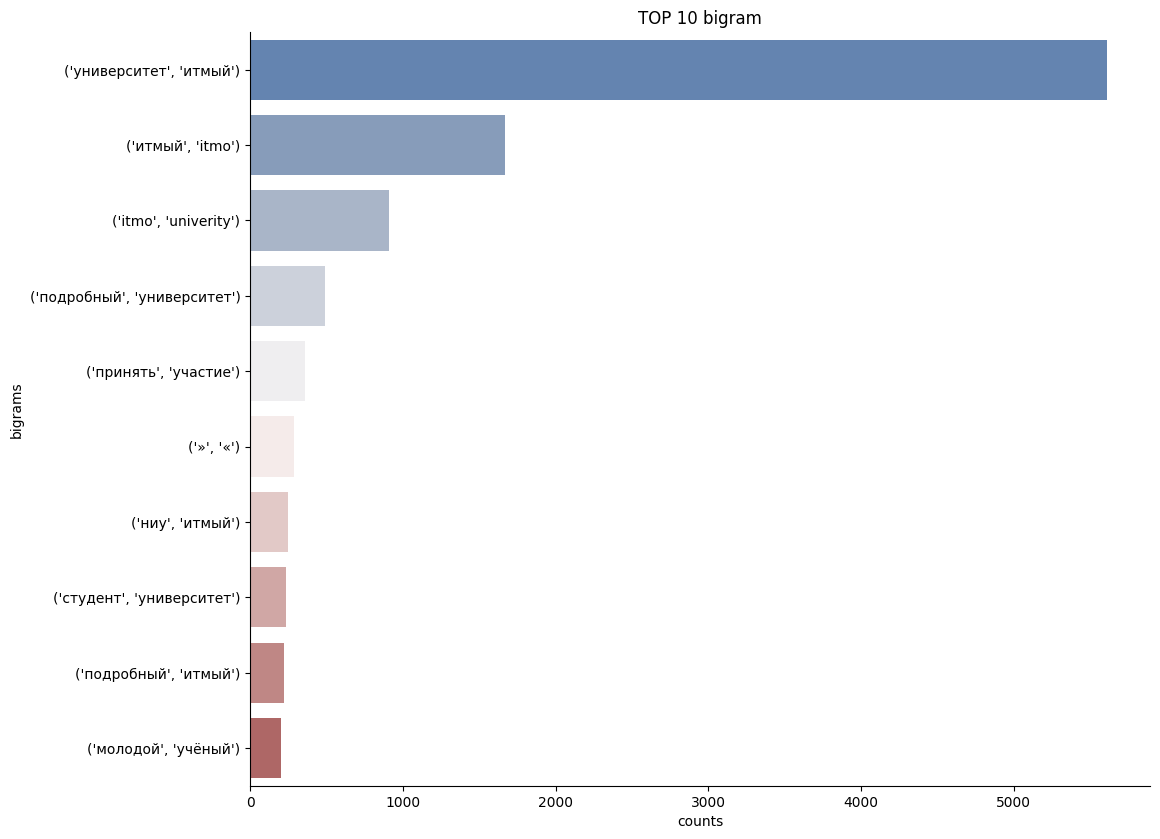

In [ ]:
# Визуализация биграмм
bigrams_series = (pd.Series(nltk.ngrams(preproc(full_text), 2)).value_counts())[:10]
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'bigrams', 'count':'counts'})
bigrams_top['bigrams'] = bigrams_top['bigrams'].astype(str)
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="vlag", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 10 bigram')

# Лабораторная работа 4

1. Исходя из вашей бд подумать какие знаки пунктуации и стоп-слова необходимо удалить, помимо базовых.
2. Применить предобработку ко всем текстам постов.
3. Добавить колонку в DataFrame с получившимся предобработанным текстом
4. Сохранить DataFrame в отдельном файле csv (Важно не пересохранить в предыдущий файл)

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
import pymorphy3
from string import punctuation
from nltk.corpus import stopwords
nltk.download('punkt')

#стоп слова
nltk.download('stopwords')  # Загрузка стоп-слов из nltk
stop_words = set(stopwords.words('russian'))

#функция предобработки текстов
morph = pymorphy3.MorphAnalyzer()
punktuations = list(punctuation)
punktuations.extend(['—', '...', '....', '!', ')', '(', '=', ';', '»', '«','``','..','"',"''",'.i','-.=','.....','.-'])
punktuations.extend(["''",'--','\u200d'])

# Функция для удаления смайликов
def remove_smileys(text):
    text_without_smileys = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', '', text)
    return text_without_smileys

def preproc (text):
  text_without_links = re.sub(r'http\S+|www\S+|\d+|[%s]', '', text) #удаление ссылок
  text_without_smileys = remove_smileys(text_without_links) #удаление смайликов (не удобно обрабатывать текст)
  token = word_tokenize(text_without_smileys.lower())  #понижение регистра
  words_without_punkt = [i for i in token if (i not in punktuations)]  #удаление пунктуации
  filter_words = [i for i in words_without_punkt if (i not in stop_words)]  #удаление стоп-слов
  lem = [morph.parse(i)[0].normal_form for i in filter_words]
  string = ' '.join(lem)
  return string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['processed_text'] = df['text'].apply(lambda x: preproc(str(x)))
df

,id_group,id_post,data,description,title,text,views,likes,reposts,processed_text
0,-94,57196,2024-04-12 13:00:03,NaN,NaN,Пятница! А где тусуются айтишники? 👇,7473.0,11,6,пятница тусоваться айтишник
1,-94,57194,2024-04-12 09:00:02,NaN,NaN,"Каждый из нас, своего рода, художник 👨🏻‍🎨 \n \...",1542.0,3,2,каждый свой род художник особенно наш друг сев...
2,-94,57190,2024-04-11 09:00:01,NaN,NaN,"Мы его ждали и он возвращается! Грандиозный, л...",3634.0,89,55,ждать возвращаться грандиозный летний свежий i...
3,-94,57182,2024-04-10 12:39:06,Где узнать больше о DevOps и IT в целом? 13 ап...,Клип @itmoru,Тут про свежую IT-конференцию👇🏻\n\nВ ролике Вя...,3703.0,18,11,свежий it-конференция ролик вячеслав евстрат s...
4,-94,57181,2024-04-10 11:41:01,NaN,NaN,Прекрасные весенние новости! ИТМО — лучший рос...,4597.0,106,18,прекрасный весенний новость итмый хороший росс...
...,...,...,...,...,...,...,...,...,...,...
15514,-94,5,2006-12-04 19:20:27,NaN,NaN,Всем привет!,NaN,0,0,весь привет
15515,-94,4,2006-12-04 19:16:02,NaN,NaN,и почему тут никто не пишет?,NaN,1,0,почему никто писать
15516,-94,3,2006-12-04 19:01:11,NaN,NaN,"ну вот, нас уже трое =)",NaN,0,0,трое
15517,-94,2,2006-12-04 18:37:05,NaN,NaN,давай пытаться =),NaN,2,0,давать пытаться


In [ ]:
# Сохранение DataFrame в отдельном файле csv
df.to_csv('/content/drive/MyDrive/preprocessed_data_soobshchestva_itmo.csv', index=False)